In [1]:
import sys
from pathlib import Path

import os

import numpy as np

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [3]:
data_path = str(Path.cwd().parents[0].parents[0] / "data" / "bh" / "BH_n5_M8_res50_10000_events.h5")
bhArray = dataToArray(data_path)

In [4]:
sphdata_path = str(Path.cwd().parents[0].parents[0] / "data" / "sph" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_10000_events.h5")
sphArray = dataToArray(sphdata_path)

In [5]:
def combineSum(array): #combine with sum
    combinedImage = array[0].copy()
    for i in range(len(array)):
        for j in range(50):
            for k in range(50):
                for rgb in range(3):
                    # if combinedImage[j][k][rgb] < [i][j][k][rgb]:
                    combinedImage[j][k][rgb] += array[i][j][k][rgb]


    return combinedImage

In [6]:
bhcombinedSum = combineSum(bhArray)
sphcombinedSum = combineSum(sphArray)

In [7]:
print(np.sum([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()]))
print(np.sum([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()]))

1190
159


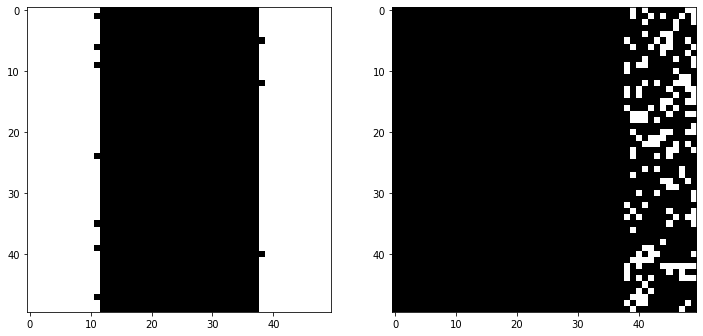

In [8]:
f, axarr = plt.subplots(1,2, figsize=(12,12))
axarr[0].imshow(np.reshape([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()],(50,50,1)),cmap='gray')
axarr[1].imshow(np.reshape([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()],(50,50,1)),cmap='gray')

In [9]:
def predbh(histo): #Returns true if bh
    a = histo[:,:,2:3].copy()
    #should be 50x50x1
    #check only valid area
    for j in range(50):
        for i in range(0,12):
            if a[j][i] != 0.0:
                # print(i,j)
                return True #bh
        
        for i in range(38,50):
            if a[j][i] != 0.0:
                # print(i,j)
                return True #bh
    return False #not bh

In [10]:
sumbh = 0
sumsph = 0
for i in range(10_000):
    if not predbh(bhArray[i]):
        sumbh += 1
    if not predbh(sphArray[i]):
        sumsph += 1

print(sumbh, "number of true bh")
print(sumsph, "number of true sph")

8672 number of true bh
9988 number of true sph
